In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import torchvision
import torch
from torch import nn, optim
import random
from torchvision import datasets
import albumentations as A
import os
import fastai
from fastai.vision import *
from fastai.metrics import error_rate,accuracy,fbeta 
BATCH_SIZE = 64

In [ ]:
!pip freeze


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
cd drive/My\ Drive/mobilenetv3-pytorch/

/content/drive/My Drive/mobilenetv3-pytorch


In [4]:
!ls dataaa/val

 Apple___Apple_scab		     'Cherry_(including_sour)___Powdery_mildew'
 Apple___Black_rot		      Potato___Early_blight
 Apple___Cedar_apple_rust	      Potato___healthy
 Apple___healthy		      Potato___Late_blight
'Cherry_(including_sour)___healthy'


In [ ]:
# from net.mobilenetv3 import MobileNetV3Large

In [ ]:
# class PlantDataset(nn.Module):
#   def __init__(self,ids,labels = None,transforms = None):
#     self.ids = ids
#     self.labels = labels
#     self.transfoms = transforms
#   def __len__(self):
#     return len(self.ids)
#   def __getitem__(self,index):
#     Id = self.ids[index]
#     X = 

In [5]:
x = ['Apple___Apple_scab','Apple___Black_rot','Apple___Cedar_apple_rust', 'Apple___healthy',
     'Cherry_(including_sour)___healthy','Cherry_(including_sour)___Powdery_mildew','Potato___Early_blight',
     'Potato___healthy','Potato___Late_blight']
# x = [i for i in os.listdir('dataaa/train/')]
# sorted(x)
x

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight']

In [6]:
data =  ImageDataBunch.from_folder('dataaa',
                                  train="train",
                                  valid="val",ds_tfms=get_transforms(),
                                  classes=x,size=256, bs=BATCH_SIZE)

In [7]:
data

ImageDataBunch;

Train: LabelList (6146 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Potato___Late_blight,Potato___Late_blight,Potato___Late_blight,Potato___Late_blight,Potato___Late_blight
Path: dataaa;

Valid: LabelList (1083 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab
Path: dataaa;

Test: None

/usr/local/lib/python3.6/dist-packages/torch/cuda/__init__.py:125: UserWarning: 
Tesla T4 with CUDA capability sm_75 is not compatible with the current PyTorch installation.
The current PyTorch install supports CUDA capabilities sm_37 sm_50 sm_60 sm_70.
If you want to use the Tesla T4 GPU with PyTorch, please check the instructions at https://pytorch.org/get-started/locally/

  warnings.warn(incompatible_device_warn.format(device_name, capability, " ".join(arch_list), device_name))


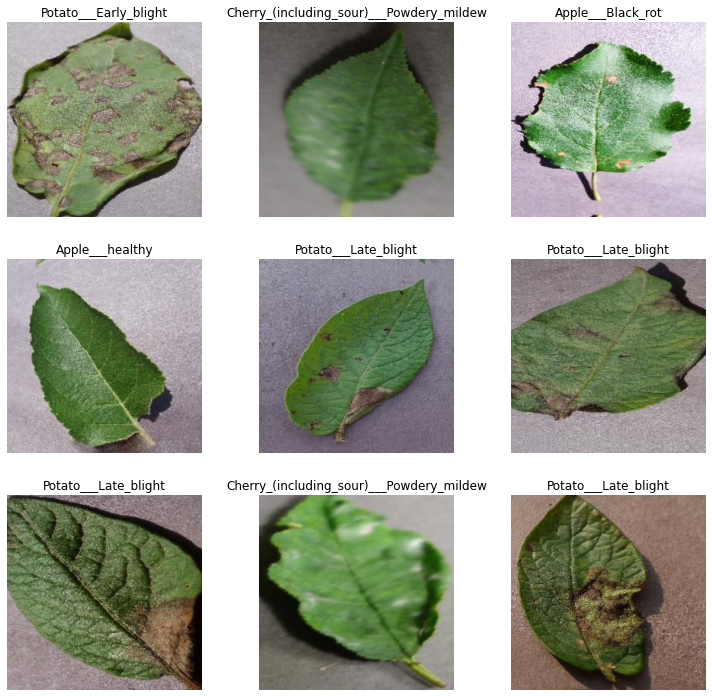

In [8]:
data.show_batch(rows=3, figsize=(10,10))

In [9]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [10]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.286291,0.051331,0.014774,38:43
1,0.127270,0.053773,0.015697,01:23
2,0.073104,0.027133,0.007387,01:22
3,0.053538,0.015648,0.007387,01:21
4,0.042548,0.007865,0.002770,01:20
5,0.029868,0.006425,0.002770,01:19
6,0.026629,0.006549,0.003693,01:19
7,0.018084,0.006330,0.000923,01:20
8,0.010857,0.006168,0.002770,01:19
9,0.008125,0.006615,0.001847,01:20


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

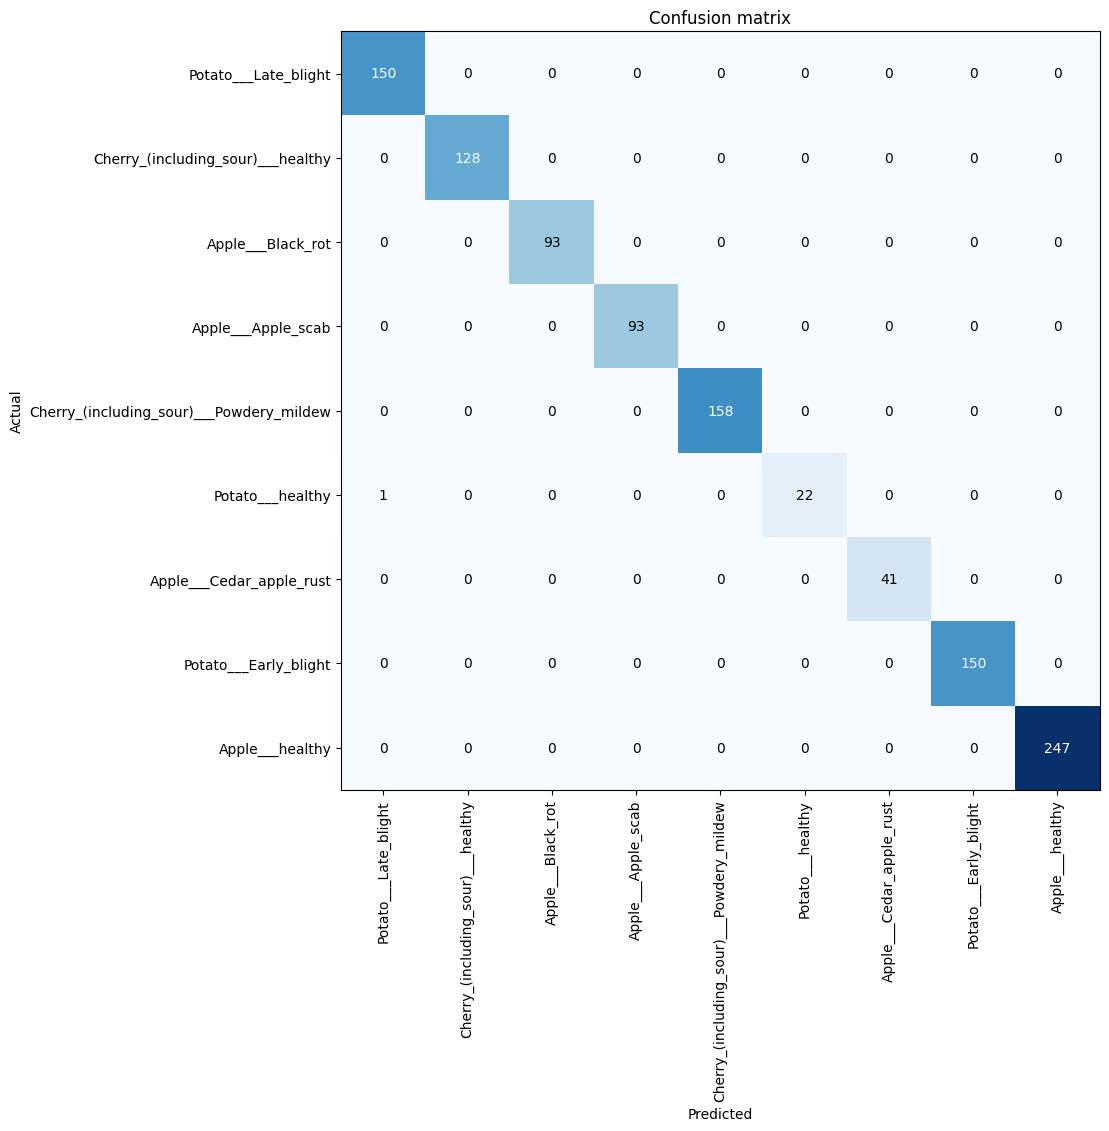

In [ ]:
interp.plot_confusion_matrix(figsize=(11,15), dpi=100)

In [11]:
learn.export('export2.pkl')

In [ ]:
learn.path

PosixPath('dataaa')

In [ ]:
predictor = load_learner('dataaa/')

In [ ]:
# from PIL import Image
img = open_image('dataaa/cherrypm1.jpg')

In [ ]:
pred,pred_idx,probs = predictor.predict(img)

In [ ]:
print(x[pred_idx])

Cherry_(including_sour)___Powdery_mildew


In [ ]:
probs

tensor([1.2311e-05, 7.9503e-05, 2.9141e-04, 8.2143e-03, 9.9068e-01, 9.7065e-05,
        3.5445e-06, 5.8523e-04, 4.0057e-05])

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


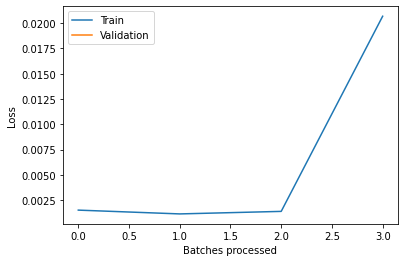

In [ ]:
learn.recorder.plot_losses()

In [ ]:
predictor = load_learner('/dataaa/models/')

FileNotFoundError: ignored

In [ ]:
ls dataaa/

appleext.jpg  cherrypm1.jpg  export.pkl  models/  potatoeb1.jpg  train/  val/
